In [2]:
import pandas as pd

# URL do dataset Wine
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Nome das colunas em português BR
column_names_pt_br = [
    'classe',
    'alcool',
    'acido_malico',
    'cinzas',
    'alcalinidade_de_cinzas',
    'magnesio',
    'fenois_totais',
    'flavanoides',
    'fenois_nao_flavanoides',
    'proantocianinas',
    'intensidade_de_cor',
    'matiz',
    'od280_od315_de_vinhos_diluidos',
    'prolina'
]

# Ler o arquivo CSV com as colunas especificadas, definindo a coluna 'classe' como object
vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': object})


ModuleNotFoundError: No module named 'pandas'

In [1]:
print(vinhos)

NameError: name 'vinhos' is not defined

In [6]:
from sklearn.model_selection import train_test_split


y = vinhos['classe']    # Coluna 'classe'
X = vinhos.iloc[:, 1:]  # Todas as colunas exceto 'classe'

# (0.3 teste e 0.7 treino)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Treinar com o k = 3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
y_pred_3 = knn3.predict(X_test)
acc_3 = accuracy_score(y_test, y_pred_3)

print(f"k=3: {acc_3:.2f}")

# Treinar com o k = 5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_pred_5 = knn5.predict(X_test)
acc_5 = accuracy_score(y_test, y_pred_5)

print(f"k=5: {acc_5:.2f}")


k=3: 0.74
k=5: 0.74


In [11]:
def avaliar_knn(random_state):
    # Dividir os dados de treino e teste novamente com random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    # avaliar o k = 5
    knn5 = KNeighborsClassifier(n_neighbors=5)
    knn5.fit(X_train, y_train)
    y_pred_5 = knn5.predict(X_test)
    acc_5 = accuracy_score(y_test, y_pred_5)

    # avaliar o k = 3
    knn3 = KNeighborsClassifier(n_neighbors=3)
    knn3.fit(X_train, y_train)
    y_pred_3 = knn3.predict(X_test)
    acc_3 = accuracy_score(y_test, y_pred_3)


    return random_state, acc_3, acc_5

# com random_state = 17 e 24
results = []
for rs in [42, 17, 24]:
    results.append(avaliar_knn(rs))

# resultados finais
for rs, acc_3, acc_5 in results:
    print(f"Random State: {rs} | k=3: {acc_3:.2f} | k=5: {acc_5:.2f}")


Random State: 42 | k=3: 0.74 | k=5: 0.74
Random State: 17 | k=3: 0.65 | k=5: 0.67
Random State: 24 | k=3: 0.74 | k=5: 0.67


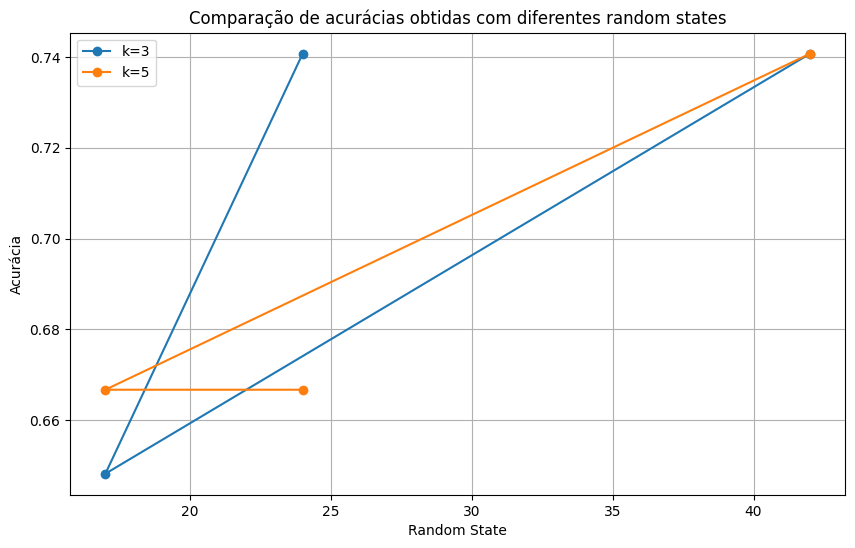

In [14]:
import matplotlib.pyplot as plt

# preparar os dados que serão mostrados no gráfico
random_states = [r[0] for r in results]
acc_k3 = [r[1] for r in results]
acc_k5 = [r[2] for r in results]

# plotar
plt.figure(figsize=(10, 6))
plt.plot(random_states, acc_k3, label='k=3', marker='o')
plt.plot(random_states, acc_k5, label='k=5', marker='o')
plt.title('Comparação de acurácias obtidas com diferentes random states')
plt.xlabel('Random State')
plt.ylabel('Acurácia')
plt.legend()
plt.grid()
plt.show()
